<a href="https://colab.research.google.com/github/FaridRash/eurusd-regression-forecasting/blob/main/Farid/Farid_1st.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Githhub

In [1]:
!git clone https://github.com/FaridRash/eurusd-regression-forecasting

Cloning into 'eurusd-regression-forecasting'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 49 (delta 16), reused 12 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (49/49), 5.06 MiB | 6.00 MiB/s, done.
Resolving deltas: 100% (16/16), done.


#Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Dataset

In [74]:
df = pd.read_csv('/content/eurusd-regression-forecasting/Dataset/EURUSD-2000-2020-15m.csv')
display(df.head())

,DATE_TIME,HIGH,LOW,OPEN,CLOSE
0,2000.01.03 00:00:00,1.0080,1.0073,1.0073,1.0077
1,2000.01.03 00:15:00,1.0087,1.0076,1.0078,1.0086
2,2000.01.03 00:30:00,1.0089,1.0079,1.0087,1.0079
3,2000.01.03 00:45:00,1.0132,1.0078,1.0078,1.0128
4,2000.01.03 01:00:00,1.0133,1.0120,1.0129,1.0122


In [75]:
df = df.drop('DATE_TIME', axis=1)
df = df.reset_index(drop=True)
display(df.head())

,HIGH,LOW,OPEN,CLOSE
0,1.0080,1.0073,1.0073,1.0077
1,1.0087,1.0076,1.0078,1.0086
2,1.0089,1.0079,1.0087,1.0079
3,1.0132,1.0078,1.0078,1.0128
4,1.0133,1.0120,1.0129,1.0122


#Preprocessing

In [76]:
df['target'] = (df['CLOSE'].shift(-1) - df['CLOSE']) * 10000
display(df.head())
display(df.tail())

,HIGH,LOW,OPEN,CLOSE,target
0,1.0080,1.0073,1.0073,1.0077,9.0
1,1.0087,1.0076,1.0078,1.0086,-7.0
2,1.0089,1.0079,1.0087,1.0079,49.0
3,1.0132,1.0078,1.0078,1.0128,-6.0
4,1.0133,1.0120,1.0129,1.0122,2.0


,HIGH,LOW,OPEN,CLOSE,target
500746,1.09007,1.08790,1.08803,1.08895,-2.3
500747,1.08936,1.08807,1.08895,1.08872,21.4
500748,1.09118,1.08853,1.08872,1.09086,-11.6
500749,1.09086,1.08946,1.09086,1.08970,-0.5
500750,1.09060,1.08953,1.08974,1.08965,NaN


In [77]:
df = df.dropna()
display(df.tail())

,HIGH,LOW,OPEN,CLOSE,target
500745,1.09087,1.08771,1.08959,1.08802,9.3
500746,1.09007,1.08790,1.08803,1.08895,-2.3
500747,1.08936,1.08807,1.08895,1.08872,21.4
500748,1.09118,1.08853,1.08872,1.09086,-11.6
500749,1.09086,1.08946,1.09086,1.08970,-0.5


#Moving Average

In [78]:
df['MA_5'] = df['CLOSE'].rolling(window=5).mean()
display(df.head())
display(df.tail())

,HIGH,LOW,OPEN,CLOSE,target,MA_5
0,1.0080,1.0073,1.0073,1.0077,9.0,NaN
1,1.0087,1.0076,1.0078,1.0086,-7.0,NaN
2,1.0089,1.0079,1.0087,1.0079,49.0,NaN
3,1.0132,1.0078,1.0078,1.0128,-6.0,NaN
4,1.0133,1.0120,1.0129,1.0122,2.0,1.00984


,HIGH,LOW,OPEN,CLOSE,target,MA_5
500745,1.09087,1.08771,1.08959,1.08802,9.3,1.089740
500746,1.09007,1.08790,1.08803,1.08895,-2.3,1.089362
500747,1.08936,1.08807,1.08895,1.08872,21.4,1.089314
500748,1.09118,1.08853,1.08872,1.09086,-11.6,1.089228
500749,1.09086,1.08946,1.09086,1.08970,-0.5,1.089250


In [79]:
df['MA_20'] = df['CLOSE'].rolling(window=20).mean()
display(df.head(11))
display(df.tail())

,HIGH,LOW,OPEN,CLOSE,target,MA_5,MA_20
0,1.0080,1.0073,1.0073,1.0077,9.0,NaN,NaN
1,1.0087,1.0076,1.0078,1.0086,-7.0,NaN,NaN
2,1.0089,1.0079,1.0087,1.0079,49.0,NaN,NaN
3,1.0132,1.0078,1.0078,1.0128,-6.0,NaN,NaN
4,1.0133,1.0120,1.0129,1.0122,2.0,1.00984,NaN
5,1.0125,1.0120,1.0123,1.0124,9.0,1.01078,NaN
6,1.0137,1.0129,1.0132,1.0133,4.0,1.01172,NaN
7,1.0141,1.0133,1.0135,1.0137,1.0,1.01288,NaN
8,1.0145,1.0134,1.0140,1.0138,3.0,1.01308,NaN
9,1.0142,1.0135,1.0135,1.0141,4.0,1.01346,NaN


,HIGH,LOW,OPEN,CLOSE,target,MA_5,MA_20
500745,1.09087,1.08771,1.08959,1.08802,9.3,1.089740,1.091733
500746,1.09007,1.08790,1.08803,1.08895,-2.3,1.089362,1.091597
500747,1.08936,1.08807,1.08895,1.08872,21.4,1.089314,1.091522
500748,1.09118,1.08853,1.08872,1.09086,-11.6,1.089228,1.091520
500749,1.09086,1.08946,1.09086,1.08970,-0.5,1.089250,1.091344


In [80]:
df = df.iloc[19:].reset_index(drop=True)
display(df.head())

,HIGH,LOW,OPEN,CLOSE,target,MA_5,MA_20
0,1.0171,1.0166,1.0167,1.0167,-2.0,1.01702,1.014385
1,1.0171,1.0165,1.0171,1.0165,2.0,1.01682,1.014825
2,1.0171,1.0164,1.0171,1.0167,0.0,1.01674,1.015230
3,1.0168,1.0165,1.0168,1.0167,2.0,1.01668,1.015670
4,1.0172,1.0166,1.0166,1.0169,9.0,1.01670,1.015875


In [81]:
display(df.tail())

,HIGH,LOW,OPEN,CLOSE,target,MA_5,MA_20
500726,1.09087,1.08771,1.08959,1.08802,9.3,1.089740,1.091733
500727,1.09007,1.08790,1.08803,1.08895,-2.3,1.089362,1.091597
500728,1.08936,1.08807,1.08895,1.08872,21.4,1.089314,1.091522
500729,1.09118,1.08853,1.08872,1.09086,-11.6,1.089228,1.091520
500730,1.09086,1.08946,1.09086,1.08970,-0.5,1.089250,1.091344


In [82]:
df = df.head(40000).reset_index(drop=True)
display(df.head())
display(df.tail())

,HIGH,LOW,OPEN,CLOSE,target,MA_5,MA_20
0,1.0171,1.0166,1.0167,1.0167,-2.0,1.01702,1.014385
1,1.0171,1.0165,1.0171,1.0165,2.0,1.01682,1.014825
2,1.0171,1.0164,1.0171,1.0167,0.0,1.01674,1.015230
3,1.0168,1.0165,1.0168,1.0167,2.0,1.01668,1.015670
4,1.0172,1.0166,1.0166,1.0169,9.0,1.01670,1.015875


,HIGH,LOW,OPEN,CLOSE,target,MA_5,MA_20
39995,0.8941,0.8932,0.8938,0.8934,3.0,0.89404,0.894225
39996,0.8941,0.8933,0.8935,0.8937,-1.0,0.89386,0.894205
39997,0.8943,0.8932,0.8938,0.8936,4.0,0.89370,0.894190
39998,0.8942,0.8932,0.8937,0.8940,-4.0,0.89372,0.894195
39999,0.8942,0.8933,0.8938,0.8936,0.0,0.89366,0.894135


#Splitting

In [83]:
from sklearn.model_selection import train_test_split

X = df[['HIGH', 'LOW', 'OPEN', 'CLOSE', 'MA_5', 'MA_20']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (32000, 6)
X_test shape: (8000, 6)
y_train shape: (32000,)
y_test shape: (8000,)


#Standardization

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('X_train_scaled shape:', X_train_scaled.shape)
print('X_test_scaled shape:', X_test_scaled.shape)

X_train_scaled shape: (32000, 6)
X_test_scaled shape: (8000, 6)


#RF Regression

In [85]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
rfr = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

# Train the model
rfr.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = rfr.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 5.374091250000001
Mean Squared Error: 61.18713171249999
R-squared: -0.09999558187317414


In [87]:
from sklearn.metrics import r2_score

# Make predictions on the train set
y_train_pred = rfr.predict(X_train_scaled)

# Evaluate the model on the train set
r2_train = r2_score(y_train, y_train_pred)

print(f'Train R-squared: {r2_train}')
print(f'Test R-squared: {r2}')

Train R-squared: 0.8428305991202734
Test R-squared: -0.09999558187317414


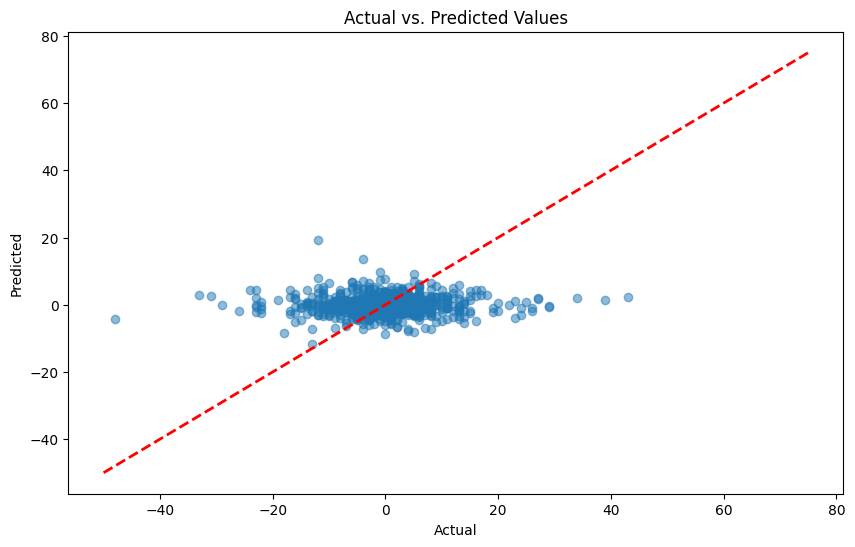

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test[:1000], y_pred[:1000], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

In [ ]:
# Create a new data point
new_data = [[1.14065, 1.13915, 1.14056, 1.13960]]

# Scale the new data point
new_data_scaled = scaler.transform(new_data)

# Make a prediction
prediction = rfr.predict(new_data_scaled)

print(f'The predicted target is: {prediction[0]}')

The predicted target is: 1.1397732999999994


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create the model
lr = LinearRegression()

# Train the model
lr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print('Linear Regression Results:')
print(f'Mean Absolute Error: {mae_lr}')
print(f'Mean Squared Error: {mse_lr}')
print(f'R-squared: {r2_lr}')

Linear Regression Results:
Mean Absolute Error: 0.0004888748384033844
Mean Squared Error: 5.96137861077583e-07
R-squared: 0.999978203807303


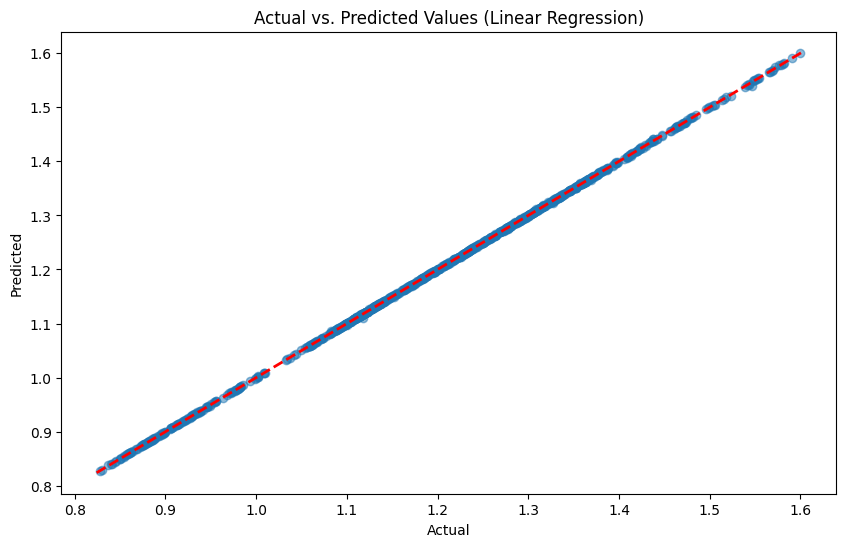

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test[:1000], y_pred_lr[:1000], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.show()